## Waste Management using CNN

In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [12]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tqdm  # Install the tqdm library
from tqdm import tqdm  # Import the tqdm function

In [1]:
pip install kaggle


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kollurusekhar","key":"bd3d06635e21b074dd2c221b3427e2dc"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 97% 415M/427M [00:01<00:00, 253MB/s]
100% 427M/427M [00:01<00:00, 240MB/s]


In [7]:
import os
import zipfile

# Path to the dataset ZIP file
dataset_zip = "waste-classification-data.zip"

# Extract the ZIP file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("waste_classification_data")

# Check the extracted files
dataset_path = "waste_classification_data"
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['DATASET', 'dataset']


In [9]:
train_path="waste_classification_data/DATASET/TRAIN"
test_path="waste_classification_data/DATASET/TEST"

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:

#Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data}) # Using pd for DataFrame

100%|██████████| 12565/12565 [00:06<00:00, 1807.57it/s]


In [14]:
data.shape

(22564, 2)

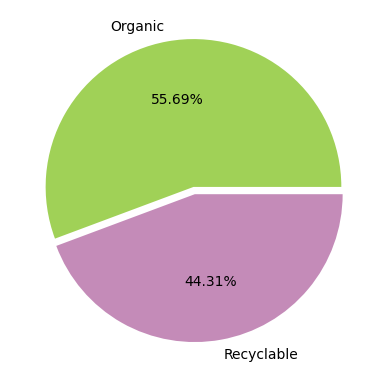

In [16]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'],autopct='%0.2f%%',colors=colors,startangle=0, explode=[0.05,0])
plt.show()


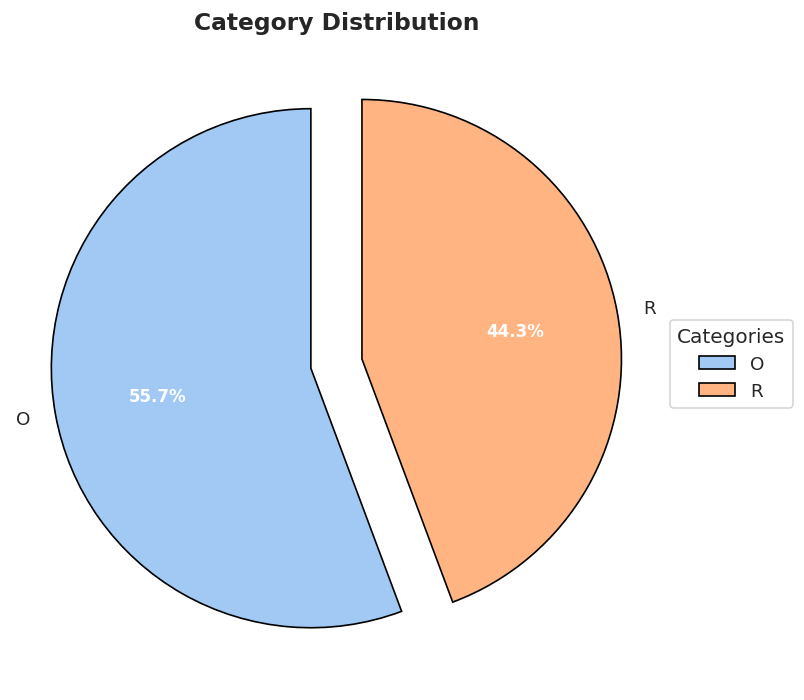

In [18]:
import seaborn as sns
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Advanced Visualization
sns.set_theme(style="whitegrid")

# Prepare data for visualization
label_counts = data['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values
colors = sns.color_palette("pastel", len(labels))  # Dynamic color palette

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=[0.1] * len(labels)  # Add slight explode effect for all categories
)

# Styling the chart
plt.setp(autotexts, size=10, weight="bold", color="white")
ax.set_title("Category Distribution", fontsize=14, fontweight="bold")
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.tight_layout()
plt.show()


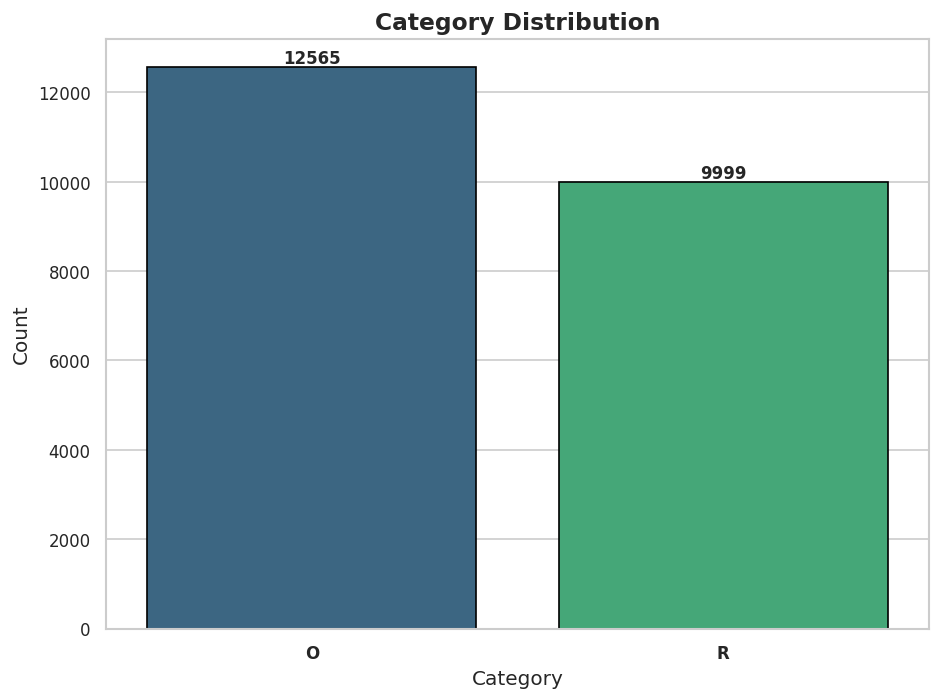

In [23]:
# Prepare data for visualization
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['Category', 'Count']

# Set the style and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", len(label_counts))

# Create the bar plot
plt.figure(figsize=(8, 6), dpi=120)
bar_plot = sns.barplot(
    x='Category',
    y='Count',
    data=label_counts,
    palette=palette,
    edgecolor='black'
)

# Add annotations
for index, row in label_counts.iterrows():
    bar_plot.text(
        x=index,
        y=row['Count'] + 2,  # Position the text slightly above the bar
        s=f"{row['Count']}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Title and labels
plt.title('Category Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

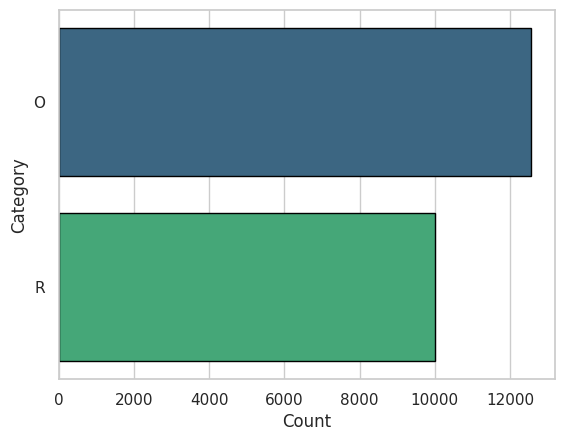

In [24]:
bar_plot = sns.barplot(
    y='Category',
    x='Count',
    data=label_counts,
    palette=palette,
    edgecolor='black'
)